In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 1C7D-D296

 Directory of C:\Users\Shubham

30-04-2020  04:33    <DIR>          .
30-04-2020  04:33    <DIR>          ..
18-12-2019  06:05    <DIR>          .anaconda
30-04-2020  04:33    <DIR>          .conda
30-04-2020  03:14                43 .condarc
24-03-2020  23:29    <DIR>          .config
29-04-2020  00:40    <DIR>          .ipynb_checkpoints
18-12-2019  06:08    <DIR>          .ipython
19-12-2019  02:54    <DIR>          .jupyter
01-02-2020  06:17    <DIR>          .matplotlib
15-03-2020  08:24    <DIR>          3D Objects
11-04-2020  04:32           191,962 abalone.csv
19-04-2020  08:47         1,368,569 Abalone.pkl
27-03-2020  05:44         3,974,404 adult.csv
13-04-2020  20:47             4,554 Advertising.csv
22-04-2020  01:34    <DIR>          Anaconda3
16-04-2020  21:13           383,408 avacado.csv
17-04-2020  21:41           174,094 avocado.csv
17-04-2020  02:22               730 avocado_linear_lr.pkl
30-04-2020

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
df_train = pd.read_excel("Data_Train.xlsx")
df_to_predict = pd.read_excel("Test_set.xlsx")

In [3]:
print("Number of rows in training dataset",df_train.shape)
print("Number of rows in prediction dataset",df_to_predict.shape)

Number of rows in training dataset (10683, 11)
Number of rows in prediction dataset (2671, 10)


In [4]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#Check for null values in the dataset
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
#Check null column values
null_columns=df_train.columns[df_train.isnull().any()]
print(df_train[df_train.isnull().any(axis=1)][null_columns].head())

     Route Total_Stops
9039   NaN         NaN


In [7]:
#drop null column values
df_train.dropna(inplace=True)

In [8]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df_train[df_train.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape

Total Duplicate Rows except first occurrence based on all columns are :


(220, 11)

In [9]:
#remove duplicate rows in training dataset
df_train.drop_duplicates(keep='first',inplace=True)

In [10]:
#See values in columns of dataset 
df_to_predict.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [11]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Data cleaning

In [12]:
print("Train set:\n",df_train["Additional_Info"].value_counts())
print("\nPrediction set:\n",df_to_predict["Additional_Info"].value_counts())

Train set:
 No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Prediction set:
 No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
1 Long layover                     1
Change airports                    1
Name: Additional_Info, dtype: int64


In [13]:
# replace repeating value in train set
df_train["Additional_Info"] = df_train["Additional_Info"].replace({'No Info': 'No info'})

In [14]:
df_to_predict["Additional_Info"].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
1 Long layover                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [15]:
df_to_predict["Destination"].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [16]:
# df_train["Destination"] = df_train["Destination"].replace({'New Delhi': 'Delhi'})
# df_to_predict["Destination"] = df_to_predict["Destination"].replace({'New Delhi': 'Delhi'})

In [17]:
# Assign values manually to Total_stops column since label encoder might assign 
# wrong values. Like it can assign value 1 to 'non-stop' or 2 to '3 stops' 
df_train.Total_Stops.replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
df_to_predict.Total_Stops.replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
df_train["Total_Stops"] = df_train["Total_Stops"].astype(int)
df_to_predict["Total_Stops"] = df_to_predict["Total_Stops"].astype(int)

In [18]:
df_train["Total_Stops"].dtype

dtype('int32')

# Feature Engineering

In [19]:
# feature engineering on Date_of_Journey column
# Extract day and month of journey from the above column in both train and test dataset

df_train["isWeekend"] = ((pd.to_datetime(df_train["Date_of_Journey"], format = '%d/%m/%Y').dt.dayofweek) // 5 == 1).astype(int)
df_train["Day_of_Week"] = pd.to_datetime(df_train["Date_of_Journey"], format = '%d/%m/%Y').dt.day_name()
df_train["Day_Of_Journey"] = pd.to_datetime(df_train["Date_of_Journey"], format = '%d/%m/%Y').dt.day
df_train["Month_of_Journey"] = pd.to_datetime(df_train["Date_of_Journey"], format = '%d/%m/%Y').dt.month

df_to_predict["isWeekend"] = ((pd.to_datetime(df_to_predict["Date_of_Journey"], format = '%d/%m/%Y').dt.dayofweek) // 5 == 1).astype(int)
df_to_predict["Day_Of_Journey"] = pd.to_datetime(df_to_predict["Date_of_Journey"], format = '%d/%m/%Y').dt.day
df_to_predict["Day_of_Week"] = pd.to_datetime(df_to_predict["Date_of_Journey"], format = '%d/%m/%Y').dt.day_name()
df_to_predict["Month_of_Journey"] = pd.to_datetime(df_to_predict["Date_of_Journey"], format = '%d/%m/%Y').dt.month

In [20]:
# Drop original feature from train and test dataset 
df_train.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
df_to_predict.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [21]:
# cleaning duration column in train dataset
duration = list(df_train["Duration"])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  
dur_seconds = []
for i in range(len(duration)) :
    dur_minutes.append(int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]))
    dur_seconds.append(int(duration[i].split()[0][:-1])*60*60 + int(duration[i].split()[1][:-1])*60)
df_train["Duration_minutes"] = dur_minutes
df_train.drop(["Duration"], axis=1, inplace = True)

In [22]:
# cleaning duration column in dataset to predict
duration = list(df_to_predict["Duration"])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  
dur_seconds = []
for i in range(len(duration)) :
    dur_minutes.append(int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]))
    dur_seconds.append(int(duration[i].split()[0][:-1])*60*60 + int(duration[i].split()[1][:-1])*60)
df_to_predict["Duration_minutes"] = dur_minutes
df_to_predict.drop(labels = 'Duration', axis = 1, inplace = True)

In [23]:
#Cleaning Departure and Arrival Times
# Training Set
df_train['Depart_Time_Hour'] = pd.to_datetime(df_train.Dep_Time).dt.hour
df_train['Depart_Time_Minutes'] = pd.to_datetime(df_train.Dep_Time).dt.minute
df_train.drop(labels = 'Dep_Time', axis = 1, inplace = True)
df_train['Arr_Time_Hour'] = pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train['Arr_Time_Minutes'] = pd.to_datetime(df_train.Arrival_Time).dt.minute
df_train.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

# Prediction Set
df_to_predict['Depart_Time_Hour'] = pd.to_datetime(df_to_predict.Dep_Time).dt.hour
df_to_predict['Depart_Time_Minutes'] = pd.to_datetime(df_to_predict.Dep_Time).dt.minute
df_to_predict.drop(labels = 'Dep_Time', axis = 1, inplace = True)
df_to_predict['Arr_Time_Hour'] = pd.to_datetime(df_to_predict.Arrival_Time).dt.hour
df_to_predict['Arr_Time_Minutes'] = pd.to_datetime(df_to_predict.Arrival_Time).dt.minute
df_to_predict.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

In [24]:
# bins = [-1, 3, 6, 9, 12, 15, 18, 21, 24]
# labels = ['late evening','magical hours','early morning','morning','early afternoon','afternoon','early evening','evening']
# df_train['part_of_day'] = pd.cut(df_train['Depart_Time_Hour'], bins=bins, labels=labels)
# df_to_predict['part_of_day'] = pd.cut(df_to_predict['Depart_Time_Hour'], bins=bins, labels=labels)

# df_train['part_of_day'] = df_train['part_of_day'].astype('category')
# df_to_predict['part_of_day'] = df_to_predict['part_of_day'].astype('category')

In [25]:
# df_train['part_of_day'].value_counts()

In [26]:
# We created X and y columns for training dataset while y column for dataset to predict will
# be generated by our model in final step
X = df_train.drop(["Price"], axis=1)
y = np.log1p(df_train["Price"])
# y = df_train["Price"]
X_to_predict = df_to_predict

In [27]:
X.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,1,Sunday,24,3,170,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,0,Wednesday,1,5,445,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,1,Sunday,9,6,1140,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,1,Sunday,12,5,325,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,0,Friday,1,3,285,16,50,21,35


In [28]:
#Separate categorical and numerical columns in dataframe
X_categorical = X.select_dtypes(exclude=['int', 'float'])
X_numerical = X.select_dtypes(include=['int', 'float'])

X_to_predict_categorical = X_to_predict.select_dtypes(exclude=['int', 'float'])
X_to_predict_numerical = X_to_predict.select_dtypes(include=['int', 'float'])

In [29]:
# Check if categorical columns are assigned properly
X_categorical.head()

#Create a back up copy specifically for plotting graphs
X_numerical_graph = X_numerical.copy()
X_categorical_graph = X_categorical.copy()

In [30]:
#Check if numerical columns are assigned properly
X_categorical.shape

(10462, 13)

In [31]:
X_numerical.head()

,Total_Stops,isWeekend
0,0,1
1,2,0
2,2,1
3,1,1
4,1,0


In [32]:
#We replace values based on insights gathered from graphs generated in further steps
X_categorical["Airline"].replace(to_replace={'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

X_to_predict_categorical["Airline"].replace(to_replace={'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

C:\Users\Shubham\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [33]:
#We replace values based on insights gathered from graphs generated in further steps
X_categorical["Additional_Info"].replace(to_replace={'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   },    
                                        inplace=True)
X_to_predict_categorical["Additional_Info"].replace(to_replace={'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   },    
                                        inplace=True)

In [34]:
X_categorical.head()

,Airline,Source,Destination,Route,Additional_Info,Day_of_Week,Day_Of_Journey,Month_of_Journey,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,Sunday,24,3,170,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,Wednesday,1,5,445,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,Sunday,9,6,1140,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,Sunday,12,5,325,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,Friday,1,3,285,16,50,21,35


In [35]:
X_categorical["Additional_Info"].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Other                             14
Name: Additional_Info, dtype: int64

In [36]:
X_categorical.head()

,Airline,Source,Destination,Route,Additional_Info,Day_of_Week,Day_Of_Journey,Month_of_Journey,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,Sunday,24,3,170,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,Wednesday,1,5,445,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,Sunday,9,6,1140,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,Sunday,12,5,325,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,Friday,1,3,285,16,50,21,35


In [37]:
#Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_categorical = X_categorical.apply(LabelEncoder().fit_transform)
X_to_predict_categorical = X_to_predict_categorical.apply(LabelEncoder().fit_transform)

In [38]:
#Check values after label encoding
X_categorical.head()

,Airline,Source,Destination,Route,Additional_Info,Day_of_Week,Day_Of_Journey,Month_of_Journey,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,3,0,5,18,3,3,8,0,13,22,4,1,2
1,1,3,0,84,3,6,0,2,65,5,10,13,3
2,4,2,1,118,3,3,3,3,202,9,5,4,5
3,3,3,0,91,3,3,4,2,41,18,1,23,6
4,3,0,5,29,3,0,0,0,33,16,10,21,7


In [39]:
#Check values in numerical columns
X_numerical.head()

,Total_Stops,isWeekend
0,0,1
1,2,0
2,2,1
3,1,1
4,1,0


In [40]:
X_numerical.head()

,Total_Stops,isWeekend
0,0,1
1,2,0
2,2,1
3,1,1
4,1,0


In [41]:
# Check the skew of all numerical features
from scipy.stats import skew
skewed_feats = X_numerical.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


Skew in numerical features: 

There are 2 skewed numerical features to Box Cox transform


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
cols_train = list(X_numerical.columns)
index_train = X_numerical.index.tolist()
cols_test = list(X_to_predict_numerical.columns)
index_test = X_to_predict_numerical.index.tolist()

# We can also use standard scaler if required...The code is commented for now
# Get column names first
X_numerical_names = X_numerical.columns
X_numerical_index = X_numerical.index
X_to_predict_numerical_names = X_to_predict_numerical.columns
# Create the Scaler object
# scaler = StandardScaler()
# Fit your data on the scaler object
# scaled_df = scaler.fit_transform(X_numerical)
# X_numerical = pd.DataFrame(scaled_df, columns=X_numerical_names, index=index_train)
# scaled_df_to_predict = scaler.fit_transform(X_to_predict_numerical)
# X_to_predict_numerical = pd.DataFrame(scaled_df_to_predict, columns=X_to_predict_numerical_names, index = index_test)

# mmx = MinMaxScaler()
# df_minmax = mmx.fit_transform(X_numerical)
# df_minmax_test = mmx.fit_transform(X_to_predict_numerical)
# X_numerical = pd.DataFrame(data=df_minmax,columns=cols_train,index=index_train)
# X_to_predict_numerical = pd.DataFrame(data=df_minmax_test,columns=cols_test,index=index_test)

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.5
for feat in skewed_features:
    #all_data[feat] += 1
    X_numerical[feat] = boxcox1p(X_numerical[feat], lam)
    X_to_predict_numerical[feat] = boxcox1p(X_to_predict_numerical[feat], lam)

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [43]:
#Check values in numerical columns after minmax scaling
X_numerical.head(5)

,Total_Stops,isWeekend
0,0.000000,0.828427
1,1.464102,0.000000
2,1.464102,0.828427
3,0.828427,0.828427
4,0.828427,0.000000


In [44]:
#Merge categorical and numerical columns back into respective X and X_to_predict
X = pd.concat([X_categorical, X_numerical], axis=1)
X_to_predict = pd.concat([X_to_predict_categorical, X_to_predict_numerical], axis=1)

In [45]:
#Check shape of all three to verify that merge was done properly in above step
print(X.shape, X_numerical.shape, X_categorical.shape)
print(X_to_predict.shape, X_to_predict_numerical.shape, X_to_predict_categorical.shape)
print(y.shape)

(10462, 15) (10462, 2) (10462, 13)
(2671, 15) (2671, 2) (2671, 13)
(10462,)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_log_error
# We have created a function to print accuracy metrics which can be used
# to get accuracy metrics of all models in upcoming steps
def print_accuracy_report(y_test, y_pred,X_test, model):
 print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))

In [47]:
# we have created a function to generate linear regression model
# which can then be called again after feature selection or other steps
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
def LinearRegressionModel(X,y):
 X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
 regressor = LinearRegression()  
 regressor.fit(X_train, y_train)
 y_pred = regressor.predict(X_test)
 print(print_accuracy_report(y_test, y_pred, X_test, regressor))
 return regressor
linearModel = LinearRegressionModel(X,y)

R Squared(Accuracy) 0.5696568757964049
Mean Absolute Error: 0.2730265794348726
Mean Squared Error: 0.11340317029384835
Root Mean Squared Error: 0.33675387198048423
Root Mean Squared Log Error 0.03378988739086223
None


In [48]:
# we have created a function to generate linear regression model
# which can then be called again after feature selection or other steps
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import accuracy_score
def BayesianRidgeModel(X,y):
 X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
 regressor = BayesianRidge()  
 regressor.fit(X_train, y_train)
 y_pred = regressor.predict(X_test)
 print(print_accuracy_report(y_test, y_pred, X_test, regressor))
 return regressor
linearModel = BayesianRidgeModel(X,y)

R Squared(Accuracy) 0.5697265251650089
Mean Absolute Error: 0.2729871843071703
Mean Squared Error: 0.11338481642977004
Root Mean Squared Error: 0.3367266197225429
Root Mean Squared Log Error 0.03378747080905275
None


In [49]:
#similarly define a function for random forest regressor
from sklearn.ensemble import RandomForestRegressor
def RandomForestRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
randomForestModel = RandomForestRegressorModel(X,y)

R Squared(Accuracy) 0.9326809572284338
Mean Absolute Error: 0.07316959507120734
Mean Squared Error: 0.01773978121660671
Root Mean Squared Error: 0.13319077001281548
Root Mean Squared Log Error 0.01328011803949834
None


In [50]:
# get feature importances from a model
import matplotlib.pyplot as plt
def plotFeatureImportances(model):
    #first print all features importances in descending order
    feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
    # Next plot feature importances to get idea about where the curve breaks
    # in the graph i.e. select top appropriate features
    features = X.columns.tolist()
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

                     importance
Duration_minutes       0.603715
Airline                0.101580
Day_Of_Journey         0.048639
Month_of_Journey       0.038735
Additional_Info        0.038202
Total_Stops            0.037136
Route                  0.023885
Depart_Time_Minutes    0.017299
Destination            0.016723
Arr_Time_Hour          0.016603
Depart_Time_Hour       0.016324
Day_of_Week            0.015591
Arr_Time_Minutes       0.014026
Source                 0.006018
isWeekend              0.005525


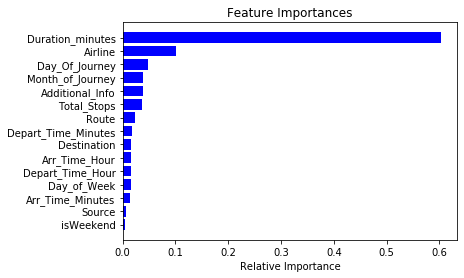

In [51]:
plotFeatureImportances(randomForestModel)

In [52]:
# select features using XGboost
from xgboost import XGBRegressor
def XGBRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =42, nthread = -1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
xgbRegressorModel = XGBRegressorModel(X,y)

C:\Users\Shubham\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


R Squared(Accuracy) 0.9198227926761979
Mean Absolute Error: 0.1030118221220414
Mean Squared Error: 0.021128139348462596
Root Mean Squared Error: 0.1453552178233124
Root Mean Squared Log Error 0.014544787448247618
None


In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
params = {
  'reg_alpha':[1e-5]
}
def XGBoostRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf=XGBRegressor(learning_rate =0.1, n_estimators=240,
     subsample=0.8, colsample_bytree=0.8,
     scale_pos_weight=1, seed=42, max_depth= 10, min_child_weight=5,gamma=0.0, reg_alpha=1e-5)
    rf_random = GridSearchCV(estimator = rf, param_grid = params, cv = 3, verbose=2, n_jobs = 8)
    rf_random.fit(X_train, y_train)
    print(rf_random.best_params_)
    y_pred = rf_random.best_estimator_.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf_random.best_estimator_))
    return rf_random.best_estimator_
xgBoostModel = XGBoostRegressorModel(X,y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:   14.4s finished
C:\Users\Shubham\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:34:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'reg_alpha': 1e-05}
R Squared(Accuracy) 0.9426001348572417
Mean Absolute Error: 0.07286494525572906
Mean Squared Error: 0.01512589911521066
Root Mean Squared Error: 0.12298739413131193
Root Mean Squared Log Error 0.01229313160653074
None


In [54]:
# generateFinalPredictionFile(xgBoostModel)

                     importance
Total_Stops            0.415307
Duration_minutes       0.164246
Airline                0.087094
Destination            0.064418
Day_Of_Journey         0.046182
Additional_Info        0.045447
Month_of_Journey       0.033951
Route                  0.030983
Source                 0.028649
Day_of_Week            0.023183
isWeekend              0.016602
Depart_Time_Hour       0.012358
Arr_Time_Hour          0.011269
Arr_Time_Minutes       0.010220
Depart_Time_Minutes    0.010093


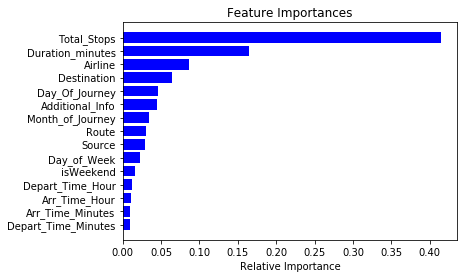

In [55]:
#get feature importances from xgbRegressormodel
plotFeatureImportances(xgbRegressorModel)

In [56]:
from sklearn.ensemble import GradientBoostingRegressor 
def GradientBoostingRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = GradientBoostingRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
gradientBoostingRegressorModel = XGBRegressorModel(X,y)

C:\Users\Shubham\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


R Squared(Accuracy) 0.9198227926761979
Mean Absolute Error: 0.1030118221220414
Mean Squared Error: 0.021128139348462596
Root Mean Squared Error: 0.1453552178233124
Root Mean Squared Log Error 0.014544787448247618
None


In [57]:
# We can either select features manually from the graphs generated above or
# we can use SelectFromModel module to select most appropriate features 
# automatically. 
# Source:- https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
import numpy as np
from sklearn.feature_selection import SelectFromModel
def SelectFeaturesFromModel (model,X):
    sel = SelectFromModel(model, prefit = True)
    selected_feat= X.columns[(sel.get_support())]
    print("Total features selected: ", len(selected_feat))
    print("Names of selected Features:\n", selected_feat)
    print("\n")

In [58]:
from sklearn.ensemble import ExtraTreesRegressor
print("Top selected from random forest regressor:")
SelectFeaturesFromModel(randomForestModel,X)

print("Top selected from xgboost regressor:")
SelectFeaturesFromModel(xgbRegressorModel,X)

Top selected from random forest regressor:
Total features selected:  2
Names of selected Features:
 Index(['Airline', 'Duration_minutes'], dtype='object')


Top selected from xgboost regressor:
Total features selected:  3
Names of selected Features:
 Index(['Airline', 'Duration_minutes', 'Total_Stops'], dtype='object')




In [ ]:
from sklearn.svm import SVR
def SVRModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    regressor=SVR(kernel='linear',degree=1)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor))
    return regressor
svRegressorModel = SVRModel(X,y)

In [ ]:
from catboost import CatBoostRegressor
import catboost as cb
from sklearn.model_selection import KFold
from paramsearch import paramsearch
from itertools import product,chain
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# 'iterations':[250,100,500,1000,2000],
#           'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
#           'l2_leaf_reg':[3,1,5,10,100],
#           'border_count':[32,5,10,20,50,100,200]
params = {'depth':[3,1,2,6,4,5,7,8,9,10],}

def CBRModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf=CatBoostRegressor()
    rf_random = GridSearchCV(estimator = rf, param_grid = params, cv = 3, verbose=2, n_jobs = 8)
    rf_random.fit(X_train, y_train)
    print(rf_random.best_params_)
    y_pred = rf_random.best_estimator_.predict(X_test)
    print(rf_random.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, rf_random.best_estimator_))
    return rf_random.best_estimator_
cegbRressorModel = CBRModel(X,y)

In [ ]:
import seaborn as sns
print(df_train['Price'].describe())
#skewness and kurtosis
print("Skewness: %f" % df_train['Price'].skew())
print("Kurtosis: %f" % df_train['Price'].kurt())
sns.distplot(df_train['Price'])

In [ ]:
#Check the new distribution 
from scipy.stats import norm, skew 
sns.distplot(np.log1p(df_train["Price"]) , fit=norm);

In [ ]:
#scatter plot Duration_minutes/Price
var = 'Duration_minutes'
data = pd.concat([df_train['Price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,90000));

In [ ]:
#scatter plot Day_Of_Journey/Price
var = 'Day_Of_Journey'
data = pd.concat([df_train['Price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,90000));

In [ ]:
#box plot Airline/Price
var = 'Airline'
data = pd.concat([df_train['Price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 14))
fig = sns.boxplot(x=var, y="Price", data=data)
plt.xticks(fontsize=10, rotation=80)
fig.axis(ymin=0, ymax=90000);

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
carrier_count = df_train["Airline"].value_counts()
df_train['Airline'].value_counts().plot('bar')

In [ ]:
sns.set(style="darkgrid")
figure(figsize=(10,5)) 
sns.barplot(x="Total_Stops", y="Price", data=df_train, palette="Blues_d")
plt.title('Total stops')

# Variation of price with different airline

In [ ]:
sns.set(style="darkgrid")
figure(figsize=(10,5)) 
sns.barplot(x="Airline", y="Price", data=df_train, palette="Blues_d")
plt.title('Price variation of different airlines')
plt.xticks(fontsize=10, rotation=80)
plt.yticks(fontsize=10)

# Frequency distribution of weekday of airline journey

In [ ]:
df_train['Additional_Info'].value_counts().plot('bar')

In [ ]:
import matplotlib.pyplot as plt
figure(figsize=(20,20)) 
X_numerical.boxplot()

In [ ]:
X_numerical_graph.hist(bins=15, figsize=(15, 16), layout=(5, 2))

In [ ]:
from scipy.stats import norm, skew 
sns.distplot(df_train["Depart_Time_Minutes"] , fit=norm);

In [ ]:
sns.distplot(np.log1p(df_train["Depart_Time_Minutes"]) , fit=norm);

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 3, figsize=(20, 80))
columns = X_categorical_graph.columns.tolist()
for variable, subplot in zip(columns, ax.flatten()):
    sns.countplot(X_categorical_graph[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [ ]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
X_categorical_graph["Additional_Info"].value_counts()

In [ ]:
X_categorical_graph["Airline"].replace(to_replace={'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)
#We have done same step back in the notebook above before label encoding to improve accuracy

In [ ]:
X_categorical_graph["Additional_Info"].replace(to_replace={'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   },    
                                        inplace=True)
#We have done same step back in the notebook above before label encoding to improve accuracy

In [ ]:
X_numerical_graph["Duration_minutes"].apply(np.log).hist()
#We have done same step back in the notebook above before scaling numrical values to improve accuracy

# Final Regression Models Optimization using GridSearchCV, RandomizedSearchCV and stacking

In [ ]:
import matplotlib.pylab as plt
import numpy as np 
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV 
def GridSearchCVGradientBoostingRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,random_state=42, test_size=0.3)
    estimator = GradientBoostingRegressor(random_state=42,n_estimators=800,learning_rate=0.05,max_depth=8)
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    param_grid={ 
                'subsample':[1.0]
               } 
    n_jobs=8
    regressor = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    regressor.fit(X_train, y_train)
    y_pred = regressor.best_estimator_.predict(X_test)
    print(regressor.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor.best_estimator_))
    return regressor.best_estimator_
gradientBoostingModelCV = GridSearchCVGradientBoostingRegressor(X,y)

In [ ]:
import matplotlib.pylab as plt
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV 
def GridSearchCVRandomForestRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    estimator = RandomForestRegressor()
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    estimator = RandomForestRegressor()
    # Create the random grid
    param_grid = { 
    'n_estimators': [10, 18, 22, 200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
    }
    n_jobs=4
    regressor = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    regressor.fit(X_train, y_train)
    y_pred = regressor.best_estimator_.predict(X_test)
    print(regressor.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor.best_estimator_))
    return regressor.best_estimator_
randomForestRegressorModel = GridSearchCVRandomForestRegressor(X,y)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit, train_test_split 

# Number of trees in random forest
n_estimators = [644]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'max_features': max_features,
               'bootstrap': bootstrap,
               'n_estimators': n_estimators
              }
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
# Fit the random search model

def RandomizedSearchCVRandomForestRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    estimator = RandomForestRegressor()
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    n_jobs=4
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = 8)
    rf_random.fit(X_train, y_train)
    print(rf_random.best_params_)
    y_pred = rf_random.best_estimator_.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf_random.best_estimator_))
    return rf_random.best_estimator_
randomForestRegressorModel2 = RandomizedSearchCVRandomForestRegressor(X,y)

In [ ]:
import matplotlib.pylab as plt
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.model_selection import GridSearchCV 
def GridSearchCVExtraTreesRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    estimator = ExtraTreesRegressor()
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    estimator = ExtraTreesRegressor(random_state=42, n_estimators=900, max_depth=18)
    # Create the random grid
    param_grid = { 
    'min_samples_split':range(10,100,5)
    }
    n_jobs=8
    regressor = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    regressor.fit(X_train, y_train)
    y_pred = regressor.best_estimator_.predict(X_test)
    print(regressor.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor.best_estimator_))
    return regressor.best_estimator_
extraTreesRegressorModelCV = GridSearchCVExtraTreesRegressor(X,y)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.model_selection import ShuffleSplit, train_test_split 

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 900, num = 15)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,5,10,50,100,200,500]    
# Method of selecting samples for training each tree
bootstrap = [True, False]
oob_score = [True, False]
# Create the random grid
random_grid = {'bootstrap':bootstrap}
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
# Fit the random search model


def RandomizedSearchCVExtraTreesRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    estimator = ExtraTreesRegressor(random_state=42, n_estimators=1100, max_depth=18,min_samples_split=2,min_samples_leaf=1,max_features ='auto')
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    n_jobs=8
    etr_random = RandomizedSearchCV(estimator = estimator, param_distributions = random_grid, cv = cv, verbose=2, random_state=42, n_jobs = 8)
    etr_random.fit(X_train, y_train)
    y_pred = etr_random.best_estimator_.predict(X_test)
    print(etr_random.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, etr_random.best_estimator_))
    return etr_random.best_estimator_
extraTreesRegressorModelRSCV = RandomizedSearchCVExtraTreesRegressor(X,y)

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

#Validation function
n_folds = 5
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,random_state=42, test_size=0.3)
   
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)


class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
                
                # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
stacked_averaged_models = StackingAveragedModels(base_models = (extraTreesRegressorModelRSCV, randomForestRegressorModel2, xgBoostModel),
                                                 meta_model = lasso)

# score = rmsle_cv(stacked_averaged_models)
# print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [ ]:
stacked_averaged_models.fit(X_train, y_train)
y_pred = stacked_averaged_models.predict(X_test)
print(print_accuracy_report(y_test, y_pred, X_test, stacked_averaged_models))

In [ ]:
generateFinalPredictionFile(stacked_averaged_models)

In [ ]:
from sklearn.externals import joblib
joblib.dump(svr,"Flight_Ticket.pkl")